In [76]:
import pandas as pd
# Libraries to work with dataframe
import numpy as np
# Libraries for datetime
import datetime as dt
# Libraries for EDA
import matplotlib as plt
import seaborn as sns
# Libraries for ML
from sklearn import linear_model, datasets
import statsmodels.api as sm

In [77]:
Calgary_df= pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\Fina_Lhl_project1\Final_Lhl_Project\weather project csv file\NOAA.csv', index_col="DATE")

In [78]:
Calgary_df

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,WDFG,WSFG
DATE,,,,,,,,,
2013-01-01,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.9,NaN,34.0,17.0,NaN,NaN
2013-01-02,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,NaN,42.0,13.0,NaN,NaN
2013-01-03,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,NaN,47.0,17.0,NaN,NaN
2013-01-04,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,NaN,37.0,12.0,NaN,NaN
2013-01-05,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,7.5,NaN,41.0,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-07-27,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.10,NaN,56.0,65.0,47.0,3.0,80.5
2023-07-28,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.22,NaN,53.0,58.0,49.0,NaN,NaN
2023-07-29,CA003031094,"CALGARY INTERNATIONAL CS, AB CA",0.00,NaN,63.0,77.0,50.0,14.0,69.3


In [79]:
Calgary_df.loc["2018-01-01",:]

STATION                        CA003031094
NAME       CALGARY INTERNATIONAL CS, AB CA
PRCP                                   0.0
SNWD                                   4.3
TAVG                                   0.0
TMAX                                  26.0
TMIN                                 -26.0
WDFG                                   0.0
WSFG                                   0.0
Name: 2018-01-01, dtype: object

In [80]:
#select column
Calgary1_df =Calgary_df.iloc[:, [2,3,5,6]].copy()

In [81]:
Calgary1_df.columns = ["precip","snow_depth","temp_max", "temp_min"]

In [82]:
Calgary1_df

,precip,snow_depth,temp_max,temp_min
DATE,,,,
2013-01-01,0.00,7.9,34.0,17.0
2013-01-02,0.00,7.5,42.0,13.0
2013-01-03,0.00,7.5,47.0,17.0
2013-01-04,0.00,7.5,37.0,12.0
2013-01-05,0.00,7.5,41.0,13.0
...,...,...,...,...
2023-07-27,0.10,NaN,65.0,47.0
2023-07-28,0.22,NaN,58.0,49.0
2023-07-29,0.00,NaN,77.0,50.0


clean up the data and fill null values

In [83]:
Calgary1_df.isnull().sum()

precip          52
snow_depth    2171
temp_max        19
temp_min        16
dtype: int64

In [84]:
Calgary1_df.apply(pd.isnull).sum()/Calgary1_df.shape[0]

precip        0.013688
snow_depth    0.571466
temp_max      0.005001
temp_min      0.004212
dtype: float64

In [85]:
Calgary1_df["snow_depth"]. value_counts()

snow_depth
0.0     333
0.4     214
2.8     136
2.0     113
1.2     105
2.4      99
3.1      88
1.6      84
0.8      82
3.5      63
3.9      58
4.3      53
4.7      43
5.1      33
6.3      30
5.5      29
5.9      17
7.5      14
6.7      12
7.1       8
8.7       3
9.4       3
7.9       2
9.1       2
9.8       1
11.4      1
10.2      1
10.6      1
Name: count, dtype: int64

In [86]:
#del Calgary1_df["SNWD"]

In [87]:
Calgary1_df

,precip,snow_depth,temp_max,temp_min
DATE,,,,
2013-01-01,0.00,7.9,34.0,17.0
2013-01-02,0.00,7.5,42.0,13.0
2013-01-03,0.00,7.5,47.0,17.0
2013-01-04,0.00,7.5,37.0,12.0
2013-01-05,0.00,7.5,41.0,13.0
...,...,...,...,...
2023-07-27,0.10,NaN,65.0,47.0
2023-07-28,0.22,NaN,58.0,49.0
2023-07-29,0.00,NaN,77.0,50.0


for precipitation,replace null value with 0

In [88]:
# select where row is null
Calgary1_df[pd.isnull(Calgary1_df["precip"])]

,precip,snow_depth,temp_max,temp_min
DATE,,,,
2013-01-23,NaN,6.3,12.0,8.0
2013-07-13,NaN,NaN,64.0,47.0
2013-07-26,NaN,NaN,73.0,NaN
2013-08-13,NaN,NaN,76.0,NaN
2013-08-14,NaN,NaN,84.0,53.0
2013-09-05,NaN,NaN,83.0,NaN
2013-10-01,NaN,NaN,56.0,33.0
2013-10-23,NaN,NaN,47.0,36.0
2014-01-08,NaN,5.1,42.0,12.0


In [89]:
# to replace with 0
Calgary1_df["precip"]=Calgary1_df["precip"].fillna(0)

In [90]:
# select where row is null for min
Calgary1_df[pd.isnull(Calgary1_df["snow_depth"])]

,precip,snow_depth,temp_max,temp_min
DATE,,,,
2013-03-31,0.00,NaN,49.0,30.0
2013-04-26,0.00,NaN,70.0,47.0
2013-04-27,0.00,NaN,65.0,39.0
2013-05-02,0.00,NaN,66.0,31.0
2013-05-03,0.04,NaN,61.0,41.0
...,...,...,...,...
2023-07-27,0.10,NaN,65.0,47.0
2023-07-28,0.22,NaN,58.0,49.0
2023-07-29,0.00,NaN,77.0,50.0


In [91]:
# to replace with  all nan with 0 in snowdepth since it is only during winter snow falls.
Calgary1_df["snow_depth"]=Calgary1_df["snow_depth"].fillna(0)

In [92]:
# select where row is null for min
Calgary1_df[pd.isnull(Calgary1_df["temp_min"])]

,precip,snow_depth,temp_max,temp_min
DATE,,,,
2013-07-26,0.0,0.0,73.0,NaN
2013-08-13,0.0,0.0,76.0,NaN
2013-09-05,0.0,0.0,83.0,NaN
2014-03-19,0.0,1.6,NaN,NaN
2014-12-10,0.0,3.9,NaN,NaN
2016-08-04,0.0,0.0,NaN,NaN
2018-10-11,0.0,2.4,NaN,NaN
2019-03-19,0.0,0.4,NaN,NaN
2019-10-19,0.0,0.0,NaN,NaN


In [93]:
# select where row is null for max
Calgary1_df[pd.isnull(Calgary1_df["temp_max"])]

,precip,snow_depth,temp_max,temp_min
DATE,,,,
2014-03-19,0.0,1.6,NaN,NaN
2014-12-10,0.0,3.9,NaN,NaN
2015-12-21,0.0,1.2,NaN,16.0
2016-05-05,0.0,0.0,NaN,52.0
2016-07-26,0.0,0.0,NaN,53.0
2016-08-04,0.0,0.0,NaN,NaN
2016-09-29,0.0,0.0,NaN,36.0
2016-10-13,0.0,0.0,NaN,22.0
2017-09-26,0.0,0.0,NaN,47.0


In [94]:
#fill all  values with the previous ones in temp_max and temp_min
Calgary1c_df = Calgary1_df.fillna(method="ffill")

In [95]:
Calgary1c_df.head()

,precip,snow_depth,temp_max,temp_min
DATE,,,,
2013-01-01,0.0,7.9,34.0,17.0
2013-01-02,0.0,7.5,42.0,13.0
2013-01-03,0.0,7.5,47.0,17.0
2013-01-04,0.0,7.5,37.0,12.0
2013-01-05,0.0,7.5,41.0,13.0


verify correct data types

In [96]:
Calgary1c_df.dtypes

precip        float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

In [97]:
Calgary1c_df.index

Index(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
       '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
       ...
       '2023-07-22', '2023-07-23', '2023-07-24', '2023-07-25', '2023-07-26',
       '2023-07-27', '2023-07-28', '2023-07-29', '2023-07-30', '2023-07-31'],
      dtype='object', name='DATE', length=3799)

In [98]:
# to convert to datetime64 index{ns}
Calgary1c_df.index = pd. to_datetime(Calgary1c_df.index)

In [99]:
# This helps to view by year or date
Calgary1c_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2023-07-22', '2023-07-23', '2023-07-24', '2023-07-25',
               '2023-07-26', '2023-07-27', '2023-07-28', '2023-07-29',
               '2023-07-30', '2023-07-31'],
              dtype='datetime64[ns]', name='DATE', length=3799, freq=None)

In [100]:
Calgary1c_df.index.year

Index([2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='DATE', length=3799)

In [101]:
Calgary1c_df.index.day_of_year

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212],
      dtype='int32', name='DATE', length=3799)

In [102]:
Calgary1c_df.index.month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
      dtype='int32', name='DATE', length=3799)

analysing weather data

<Axes: xlabel='DATE'>

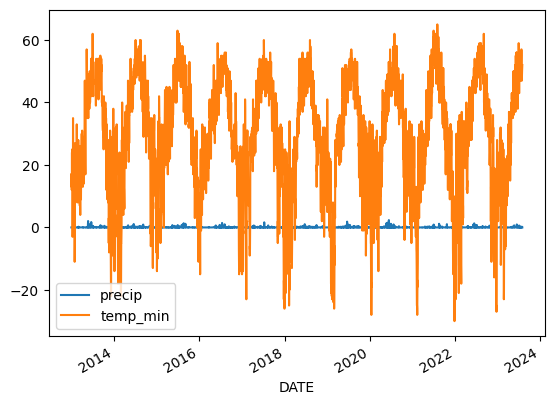

In [103]:
Calgary1c_df[["precip","temp_min"]].plot()

<Axes: xlabel='DATE'>

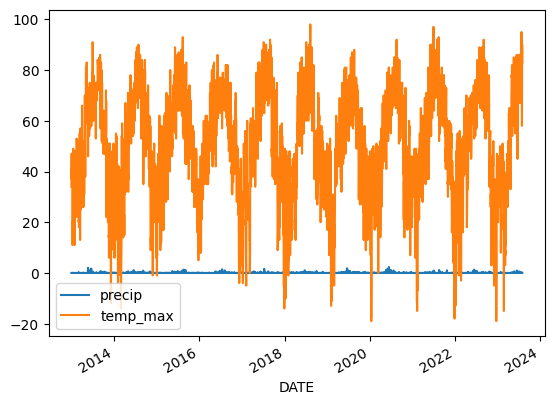

In [104]:
Calgary1c_df[["precip","temp_max"]].plot()

<Axes: xlabel='DATE'>

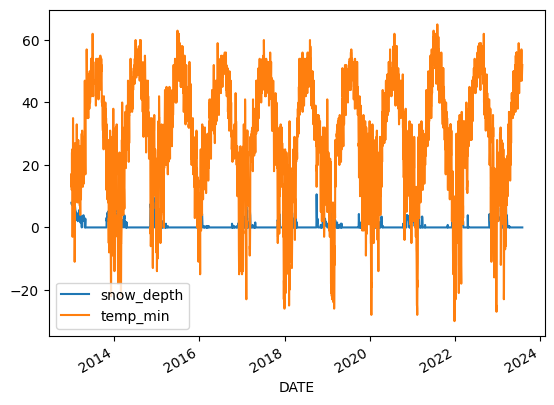

In [105]:
Calgary1c_df[["snow_depth","temp_min"]].plot()

<Axes: xlabel='DATE'>

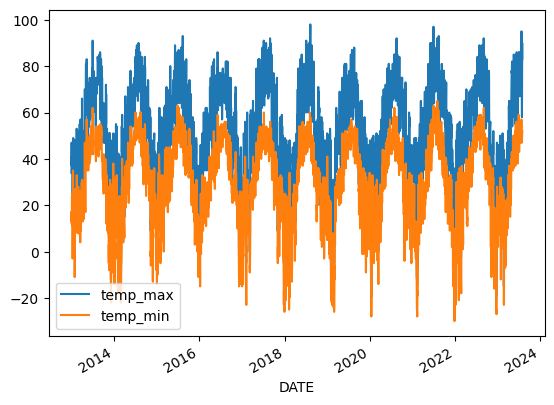

In [106]:
Calgary1c_df[["temp_max","temp_min"]].plot()

<Axes: xlabel='DATE'>

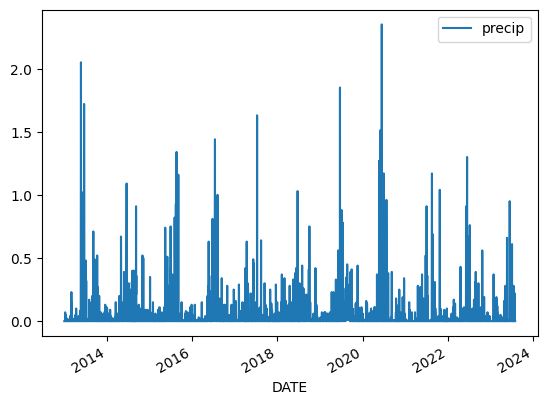

In [107]:
Calgary1c_df[["precip"]].plot()

<Axes: xlabel='DATE'>

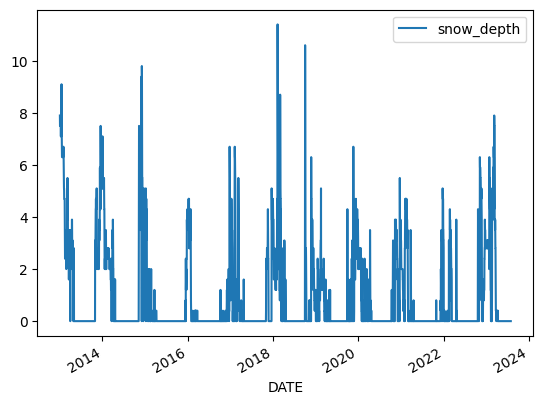

In [108]:
Calgary1c_df[["snow_depth"]].plot()

<Axes: xlabel='DATE'>

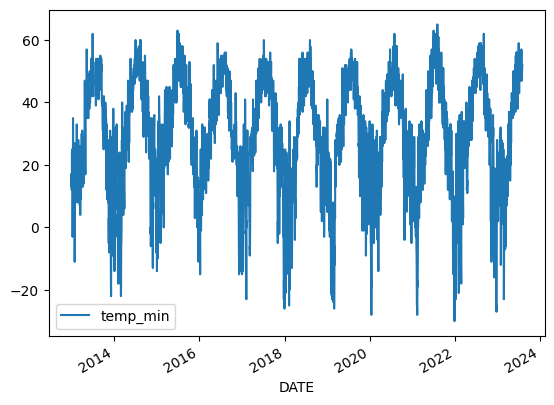

In [109]:
Calgary1c_df[["temp_min"]].plot()

In [110]:
# checking values for each year
Calgary1c_df.index.year.value_counts().sort_index

<bound method Series.sort_index of DATE
2022    365
2020    364
2015    363
2019    363
2021    363
2014    362
2017    360
2018    360
2016    358
2013    329
2023    212
Name: count, dtype: int64>

In [111]:
# checking total weather condition per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()

,precip,snow_depth,temp_max,temp_min
DATE,,,,
2013,15.85,730.8,16326.0,9300.0
2014,14.36,478.4,18147.0,10741.0
2015,14.30,121.7,19518.0,11657.0
2016,15.72,168.4,18921.0,11047.0
2017,13.40,255.2,18771.0,10453.0
2018,13.21,393.4,18071.0,9790.0
2019,16.44,257.5,17630.0,9850.0
2020,18.83,245.6,18533.0,10480.0
2021,10.89,213.1,19008.0,10441.0


In [112]:
#snow-depth per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()["snow_depth"]

DATE
2013    730.8
2014    478.4
2015    121.7
2016    168.4
2017    255.2
2018    393.4
2019    257.5
2020    245.6
2021    213.1
2022    250.3
2023    280.7
Name: snow_depth, dtype: float64

In [113]:
#prep per year
Calgary1c_df.groupby(Calgary1c_df.index.year).sum()["precip"]

DATE
2013    15.85
2014    14.36
2015    14.30
2016    15.72
2017    13.40
2018    13.21
2019    16.44
2020    18.83
2021    10.89
2022    12.98
2023     6.48
Name: precip, dtype: float64

training machine tearning data set

target variable= temp_min while others are the predictors

In [114]:
Calgary1c_df["target"] = Calgary1c_df. shift(-1)["temp_min"]

In [115]:
Calgary1c_df

,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,
2013-01-01,0.00,7.9,34.0,17.0,13.0
2013-01-02,0.00,7.5,42.0,13.0,17.0
2013-01-03,0.00,7.5,47.0,17.0,12.0
2013-01-04,0.00,7.5,37.0,12.0,13.0
2013-01-05,0.00,7.5,41.0,13.0,24.0
...,...,...,...,...,...
2023-07-27,0.10,0.0,65.0,47.0,49.0
2023-07-28,0.22,0.0,58.0,49.0,50.0
2023-07-29,0.00,0.0,77.0,50.0,51.0


 the above predicted tomorrows temp-min from today

=============================================================================================================================

remove the last value for with nan(   'r' in Calgary1cr_df mean removed)

In [116]:
Calgary1cr_df= Calgary1c_df.iloc[:-1,:].copy()

In [117]:
Calgary1cr_df

,precip,snow_depth,temp_max,temp_min,target
DATE,,,,,
2013-01-01,0.00,7.9,34.0,17.0,13.0
2013-01-02,0.00,7.5,42.0,13.0,17.0
2013-01-03,0.00,7.5,47.0,17.0,12.0
2013-01-04,0.00,7.5,37.0,12.0,13.0
2013-01-05,0.00,7.5,41.0,13.0,24.0
...,...,...,...,...,...
2023-07-26,0.00,0.0,75.0,48.0,47.0
2023-07-27,0.10,0.0,65.0,47.0,49.0
2023-07-28,0.22,0.0,58.0,49.0,50.0


use regression model because it reduces overfitting

In [118]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [119]:
# Create a Ridge Regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha (regularization strength)


In [120]:
predictors = ["precip","snow_depth","temp_max"] #"temp_min" 


In [121]:
# for time series of one day prediction
train = Calgary1cr_df.loc[:"2020-12-31"]# train set = all data before 2020-012-31
test = Calgary1cr_df.loc["2021-01-01":]# test set = all data after 2021-01-01

In [122]:
ridge_model = Ridge(alpha=0.1)

In [123]:
ridge_model.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [124]:
predictions = ridge_model.predict(test[predictors])

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [126]:
# Calculate evaluation metrics for Ridge Regression
mse_ridge = mean_squared_error(test["target"], predictions)
rmse_ridge = mean_squared_error(test["target"], predictions, squared=False)
mae_ridge = mean_absolute_error(test["target"], predictions)
r2_ridge = r2_score(test["target"], predictions)

In [127]:
print("Ridge Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"R-squared (Coefficient of Determination): {r2_ridge:.2f}")

Ridge Regression Metrics:
Mean Squared Error (MSE): 49.23
Root Mean Squared Error (RMSE): 7.02
Mean Absolute Error (MAE): 5.32
R-squared (Coefficient of Determination): 0.88


In [128]:
mae_ridge

5.315109190100554

In [129]:
r2_ridge

0.8754937029337202

Mean Absolute Error (MAE): MAE measures the average absolute difference between predicted and actual values. It provides a sense of the model's accuracy, and like MSE and RMSE, lower values are preferred.
R-squared (Coefficient of Determination): R-squared measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (predictors). It ranges from 0 to 1, where higher values indicate a better fit. An R-squared value of 0.88 means that approximately 88% of the variability in the target variable is explained by the model's predictors.
The metrics show that the model's predictions are relatively close to the actual values, and the R-squared value of 0.88 suggests that the model explains a significant portion of the variability in the target variable.

In [130]:
#combine predictions for ''temp_min''
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual","predictions"]

In [131]:
combined

,actual,predictions
DATE,,
2021-01-01,18.0,17.190353
2021-01-02,20.0,22.636333
2021-01-03,18.0,20.009307
2021-01-04,22.0,16.579192
2021-01-05,18.0,20.333088
...,...,...
2023-07-26,47.0,47.478487
2023-07-27,49.0,40.923318
2023-07-28,50.0,36.811011


<Axes: xlabel='DATE'>

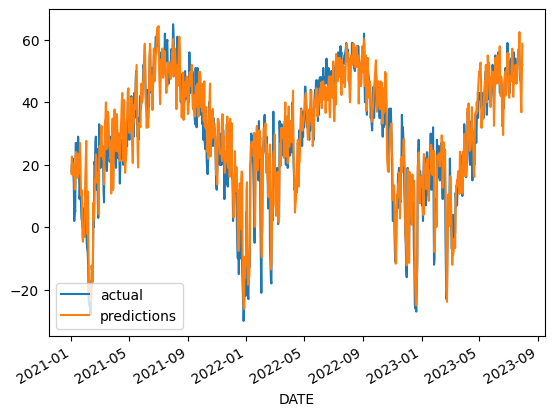

In [132]:
combined.plot()

little variations occured as we can see.

In [133]:
ridge_model.coef_

array([ 9.52623501, -0.80945195,  0.75077928])

These coefficients represent the estimated impact of each predictor on the target variable (temp_min)
Precipitation (precip): 9.52623501 This indicate a positive coefficient indicates that an increase in precipitation is associated with an increase in the temp_min.
Analysis: This suggests that higher levels of precipitation are correlated with higher minimum temperatures. This might be due to the fact that rainy or wet conditions can lead to a warming effect, preventing temperatures from dropping as low.
Snow Depth (snow_depth): -0.80945195 :a negative coefficient indicates that an increase in snow depth is associated with a decrease in the temp_min.
Analysis: This suggests an inverse relationship between snow depth and minimum temperature. As snow accumulates, it tends to have a cooling effect on the surrounding environment, resulting in lower minimum temperatures.
Maximum Temperature (temp_max): 0.75077928 a positive coefficient indicates that an increase in maximum temperature is associated with an increase in the temp_min.
Analysis: This suggests that higher maximum temperatures are correlated with higher minimum temperatures. Warmer days might lead to milder nights, resulting in higher minimum temperatures.

Creating functions  to make predictions(ie contain the prediction)

In [134]:
def create_predictions(predictors, Calgary1cr_df,ridge_model):
    train = Calgary1cr_df.loc[:"2020-12-31"]# train set = all data before 2020-012-31
    test = Calgary1cr_df.loc["2021-01-01":]# test set = all data after 2021-01-01   
    ridge_model.fit(train[predictors], train["target"])
    predictions = ridge_model.predict(test[predictors])
    mae_ridge = mean_absolute_error(test["target"], predictions)
    r2_ridge = r2_score(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual","predictions"]     
    return mae_ridge,r2_ridge,combined
    

creating more predictors, feeding to reduce error

In [135]:
#find the average temp for each month
Calgary1cr_df["avg_Mtemp_max"] =Calgary1cr_df["temp_max"].rolling(30).mean()


In [136]:
Calgary1cr_df

,precip,snow_depth,temp_max,temp_min,target,avg_Mtemp_max
DATE,,,,,,
2013-01-01,0.00,7.9,34.0,17.0,13.0,NaN
2013-01-02,0.00,7.5,42.0,13.0,17.0,NaN
2013-01-03,0.00,7.5,47.0,17.0,12.0,NaN
2013-01-04,0.00,7.5,37.0,12.0,13.0,NaN
2013-01-05,0.00,7.5,41.0,13.0,24.0,NaN
...,...,...,...,...,...,...
2023-07-26,0.00,0.0,75.0,48.0,47.0,78.000000
2023-07-27,0.10,0.0,65.0,47.0,49.0,77.566667
2023-07-28,0.22,0.0,58.0,49.0,50.0,76.866667


The first 30 days doesn't have the 	avg_Mtemp_max because we specified  that its the mean of  first 30 days to the date that it should create. 30 days is needed for a row to be calculated.

In [137]:
# For this given day, was the temp mean different or not.
Calgary1cr_df["day_month_max"]= Calgary1cr_df["avg_Mtemp_max"]/Calgary1cr_df["temp_max"]


In [138]:
#ratio between max and min temp
Calgary1cr_df["max_min_ratio"]= Calgary1cr_df["temp_max"]/Calgary1cr_df["temp_min"]

In [139]:
predictors = ["precip","snow_depth","temp_max","avg_Mtemp_max","day_month_max","max_min_ratio"]

In [140]:
Calgary1cr_df

,precip,snow_depth,temp_max,temp_min,target,avg_Mtemp_max,day_month_max,max_min_ratio
DATE,,,,,,,,
2013-01-01,0.00,7.9,34.0,17.0,13.0,NaN,NaN,2.000000
2013-01-02,0.00,7.5,42.0,13.0,17.0,NaN,NaN,3.230769
2013-01-03,0.00,7.5,47.0,17.0,12.0,NaN,NaN,2.764706
2013-01-04,0.00,7.5,37.0,12.0,13.0,NaN,NaN,3.083333
2013-01-05,0.00,7.5,41.0,13.0,24.0,NaN,NaN,3.153846
...,...,...,...,...,...,...,...,...
2023-07-26,0.00,0.0,75.0,48.0,47.0,78.000000,1.040000,1.562500
2023-07-27,0.10,0.0,65.0,47.0,49.0,77.566667,1.193333,1.382979
2023-07-28,0.22,0.0,58.0,49.0,50.0,76.866667,1.325287,1.183673


In [141]:

Calgary1cr_df.isna().sum()

precip            0
snow_depth        0
temp_max          0
temp_min          0
target            0
avg_Mtemp_max    29
day_month_max    29
max_min_ratio     0
dtype: int64

In [142]:
# remove the firt 31 days of this prediction that has nan as avg_Mtemp_max
Calgary1cr_df=Calgary1cr_df.iloc[31:,:].copy()

In [143]:
Calgary1cr_df.isna().sum()

precip           0
snow_depth       0
temp_max         0
temp_min         0
target           0
avg_Mtemp_max    0
day_month_max    0
max_min_ratio    0
dtype: int64

In [144]:
# dataframe afternan rows have been removed for the first 31 days 
Calgary1cr_df

,precip,snow_depth,temp_max,temp_min,target,avg_Mtemp_max,day_month_max,max_min_ratio
DATE,,,,,,,,
2013-02-01,0.00,6.7,45.0,22.0,19.0,32.400000,0.720000,2.045455
2013-02-02,0.00,6.3,48.0,19.0,27.0,32.433333,0.675694,2.526316
2013-02-03,0.00,5.9,42.0,27.0,26.0,32.600000,0.776190,1.555556
2013-02-04,0.00,5.5,45.0,26.0,19.0,32.733333,0.727407,1.730769
2013-02-05,0.00,5.1,44.0,19.0,22.0,32.833333,0.746212,2.315789
...,...,...,...,...,...,...,...,...
2023-07-26,0.00,0.0,75.0,48.0,47.0,78.000000,1.040000,1.562500
2023-07-27,0.10,0.0,65.0,47.0,49.0,77.566667,1.193333,1.382979
2023-07-28,0.22,0.0,58.0,49.0,50.0,76.866667,1.325287,1.183673


above show reduced rows

In [145]:
def create_predictions(predictors, Calgary1cr_df,ridge_model):
    train = Calgary1cr_df.loc[:"2020-12-31"]# train set = all data before 2020-012-31
    test = Calgary1cr_df.loc["2021-01-01":]# test set = all data after 2021-01-01   
    ridge_model.fit(train[predictors], train["target"])
    predictions = ridge_model.predict(test[predictors])
    mae_ridge = mean_absolute_error(test["target"], predictions)
    r2_ridge = r2_score(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual","predictions"]     
    return mae_ridge,combined

In [146]:
r2_ridge

0.8754937029337202

In [147]:
mae_ridge ,combined

(5.315109190100554,
             actual  predictions
 DATE                           
 2021-01-01    18.0    17.190353
 2021-01-02    20.0    22.636333
 2021-01-03    18.0    20.009307
 2021-01-04    22.0    16.579192
 2021-01-05    18.0    20.333088
 ...            ...          ...
 2023-07-26    47.0    47.478487
 2023-07-27    49.0    40.923318
 2023-07-28    50.0    36.811011
 2023-07-29    51.0    48.980046
 2023-07-30    52.0    58.740177
 
 [939 rows x 2 columns])

<Axes: xlabel='DATE'>

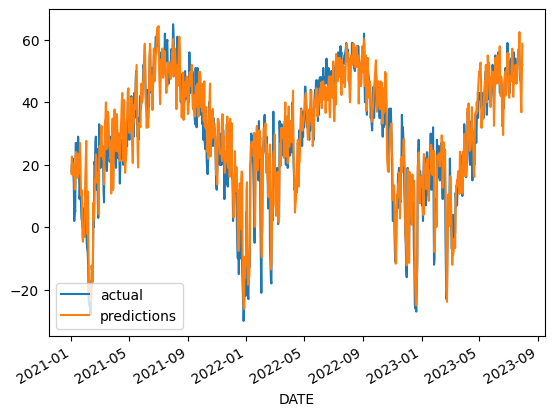

In [148]:
combined.plot()

adding in monthly and daily averages


In [149]:
import pandas as pd

# Assuming Calgary1cr_df is your DataFrame

# Calculate rolling expanding monthly average of "temp_max"
monthly_avg = Calgary1cr_df.groupby(Calgary1cr_df.index.month)["temp_max"].expanding(1).mean()

# Assign the calculated values to a new column "monthly_avg"
Calgary1cr_df["monthly_avg"] = monthly_avg.values


In [151]:
Calgary1cr_df

,precip,snow_depth,temp_max,temp_min,target,avg_Mtemp_max,day_month_max,max_min_ratio,monthly_avg
DATE,,,,,,,,,
2013-02-01,0.00,6.7,45.0,22.0,19.0,32.400000,0.720000,2.045455,31.000000
2013-02-02,0.00,6.3,48.0,19.0,27.0,32.433333,0.675694,2.526316,39.000000
2013-02-03,0.00,5.9,42.0,27.0,26.0,32.600000,0.776190,1.555556,38.333333
2013-02-04,0.00,5.5,45.0,26.0,19.0,32.733333,0.727407,1.730769,31.750000
2013-02-05,0.00,5.1,44.0,19.0,22.0,32.833333,0.746212,2.315789,26.600000
...,...,...,...,...,...,...,...,...,...
2023-07-26,0.00,0.0,75.0,48.0,47.0,78.000000,1.040000,1.562500,28.324590
2023-07-27,0.10,0.0,65.0,47.0,49.0,77.566667,1.193333,1.382979,28.323529
2023-07-28,0.22,0.0,58.0,49.0,50.0,76.866667,1.325287,1.183673,28.312704


In [154]:
import matplotlib.pyplot as plt

# Resetting the index to have 'Year' and 'Month' as regular columns
Calgary1cr_df_reset = Calgary1cr_df.reset_index()


# Extract year from the 'Date' column
Calgary1cr_df_reset['Year'] = Calgary1cr_df_reset['Year'].dt.year

# Plotting the 'temp_max column
plt.figure(figsize=(8, 4))
for year in Calgary1cr_df_reset['Year'].unique():
    year_data = Calgary1cr_df_reset[Calgary1cr_df_reset['Year'] == year]
    plt.plot(year_data['Date'], year_data['Max Temp (°C)'], label=str(year))

plt.title('Mean Max Temp (°C)')
plt.xlabel('Date')
plt.ylabel('Max Temp (°C)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


KeyError: 'Year'

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Create a Ridge Regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha (regularization strength)
predictors = ["precip", "snow_depth", "temp_max"]  # Add more predictors if needed

# for time series of one day prediction
train = Calgary1cr_df.loc[:"2020-12-31"]  # train set = all data before 2020-12-31
test = Calgary1cr_df.loc["2021-01-01":]   # test set = all data after 2021-01-01

# Scaling the data using StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[predictors])
test_scaled = scaler.transform(test[predictors])

# Fit the Ridge model on scaled training data
ridge_model.fit(train_scaled, train["target"])

# Predict using the Ridge model on scaled test data
predictions = ridge_model.predict(test_scaled)

# Calculate evaluation metrics for Ridge Regression
mse_ridge = mean_squared_error(test["target"], predictions)
rmse_ridge = mean_squared_error(test["target"], predictions, squared=False)
mae_ridge = mean_absolute_error(test["target"], predictions)
r2_ridge = r2_score(test["target"], predictions)

print("Ridge Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"R-squared (Coefficient of Determination): {r2_ridge:.2f}")


In [152]:
import matplotlib.pyplot as plt

# Resetting the index to have 'Year' and 'Month' as regular columns
Calgary1cr_df_reset = Calgary1cr_df.reset_index()

# Plotting the 'Max Temp (°C)' column
plt.figure(figsize=(8, 4))
for year in Calgary1cr_df_reset['Year'].unique():
    year_data =Calgary1cr_df_reset[Calgary1cr_df_reset['Year'] == year]
    plt.plot(year_data['Month'], year_data['Max Temp (°C)'], label=str(year))

plt.title('Mean Max Temp (°C)')
plt.xlabel('Month')
plt.ylabel('Max Temp (°C)')
plt.legend()
plt.xticks(Calgary1cr_df_reset_reset['Month'])  # Set x-axis ticks to the unique months
plt.tight_layout()
plt.show()

KeyError: 'Year'

<Figure size 800x400 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Resetting the index to have 'Year' and 'Month' as regular columns
yearmonth_weather_avg_reset = yearmonth_weather_avg.reset_index()

# Plotting the 'Max Temp (°C)' column
plt.figure(figsize=(8, 4))
for year in yearmonth_weather_avg_reset['Year'].unique():
    year_data = yearmonth_weather_avg_reset[yearmonth_weather_avg_reset['Year'] == year]
    plt.plot(year_data['Month'], year_data['Max Temp (°C)'], label=str(year))

plt.title('Mean Max Temp (°C)')
plt.xlabel('Month')
plt.ylabel('Max Temp (°C)')
plt.legend()
plt.xticks(yearmonth_weather_avg_reset['Month'])  # Set x-axis ticks to the unique months
plt.tight_layout()
plt.show()

import pandas as pd
weather_features = ['Max Temp (°C)', 'Min Temp (°C)', 'Mean Temp (°C)', 'Heat Deg Days (°C)',
                    'Cool Deg Days (°C)', 'Total Precip (mm)', 'Snow on Grnd (cm)']

# Grouping by 'Year' and 'Month' and calculating the mean values for weather features
yearmonth_weather_avg = winnipegcol_df.groupby(['Year','Month'])[weather_features].mean()

# Displaying the calculated averages
yearmonth_weather_avg

In [150]:
# Assuming you have test_df and my_pred already defined
# Reset the index of test_df
test_df_reset = test.reset_index(drop=True)  # Reset the index and drop the old index

# Create the DataFrame for submission
submission_df = pd.DataFrame({'id': test_df_reset['id'], 'monthly_avg': predictions})

# Save the submission DataFrame to a CSV file
#submission_df.to_csv('submission.csv', index=False)


KeyError: 'id'

In [ ]:
import pandas as pd

# Assuming Calgary1cr_df is your DataFrame

# Calculate rolling expanding monthly average of "temp_max"
monthly_avg = Calgary1cr_df.groupby(Calgary1cr_df.index.month)["temp_max"].expanding(1).mean()

# Assign the calculated values to a new column "monthly_avg"
Calgary1cr_df["monthly_avg"] = monthly_avg.values


In [ ]:
#adding in monthly_average
Calgary1cr_df["monthly_avg"]= Calgary1cr_df["temp_max"].groupby(Calgary1cr_df.index.month).apply(lambda x: x.expanding(1).mean())


TypeError: incompatible index of inserted column with frame index

In [ ]:
Calgary1cr_df

,precip,snow_depth,temp_max,temp_min,target,avg_Mtemp_max,day_month_max,max_min_ratio
DATE,,,,,,,,
2013-02-01,0.00,6.7,45.0,22.0,19.0,32.400000,0.720000,2.045455
2013-02-02,0.00,6.3,48.0,19.0,27.0,32.433333,0.675694,2.526316
2013-02-03,0.00,5.9,42.0,27.0,26.0,32.600000,0.776190,1.555556
2013-02-04,0.00,5.5,45.0,26.0,19.0,32.733333,0.727407,1.730769
2013-02-05,0.00,5.1,44.0,19.0,22.0,32.833333,0.746212,2.315789
...,...,...,...,...,...,...,...,...
2023-07-26,0.00,0.0,75.0,48.0,47.0,78.000000,1.040000,1.562500
2023-07-27,0.10,0.0,65.0,47.0,49.0,77.566667,1.193333,1.382979
2023-07-28,0.22,0.0,58.0,49.0,50.0,76.866667,1.325287,1.183673


In [ ]:
#day of the year average
Calgary1cr_df["day_of_year_avg"]= Calgary1cr_df["temp_max"].groupby(Calgary1cr_df.index.day_of_year).apply(lambda x: x.expanding(1).mean())

TypeError: incompatible index of inserted column with frame index

In [ ]:
#diff btw the actual value  and combined = absolute difference
Calgary1cr_df["diff"]= (combined["actual"] -combined["predictions"]).abs()